In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# exploration questions:
# are there any months in the year that seem to be higher AQI? lower AQI?
# are there any gases that change in level frequently? are there any that seem to change in tandem with others?

## AQI Basics

    Daily AQI color     Level of concern           Value of index     Desc. of air quality

    Green               Good                       0 to 50            Air quality is satisfactory, and air pollution poses
                                                                      little or no risk.

    Yellow              Moderate                   51 to 100          Air quality is acceptable. However, there may be a
                                                                      risk for some people, particularly those who are
                                                                      unusually sensitive to air pollution.

    Orange              Unhealthy for sensitive    101 to 150         Members of sensitive groups may experience health
                                                                      effects. The general public is less likely to be
                                                                      affected.

    Red                 Unhealthy                  151 to 200         Some members of the general public may experience
                                                                      health effects; members of sensitive groups may
                                                                      experience more serious health effects.

    Purple              Very unhealthy             201 to 300         Health alert: The risk of health effects is increased
                                                                      for everyone.

    Maroon              Hazardous                  301+               Health warning of emergency conditions: everyone
                                                                      is more likely to be affected.
        

In [3]:
air_quality = pd.read_csv('data/aqi_data.csv')
air_quality.columns

Index(['Id', 'Mounths', 'PM10 in æg/m3', 'SO2 in æg/m3', 'NOx  in æg/m3',
       ' PM2.5  in æg/m3', 'Ammonia - NH3  in æg/m3', 'O3   in æg/m3',
       'CO  in mg/m3', ' Benzene  in æg/m3', 'AQI'],
      dtype='object')

In [4]:
# renaming columns
air_quality.columns = ['id', 'month', 'PM10', 'SO2', 'NOx', 'PM25', 'NH3', 'O3', 'CO', 'benzene', 'AQI']
air_quality

,id,month,PM10,SO2,NOx,PM25,NH3,O3,CO,benzene,AQI
0,1,Jan-17,174.0,26.4,35.0,79,25.0,107.6,0.90,0.70,149.0
1,2,Feb-17,143.0,35.1,40.3,75,31.0,103.0,0.90,0.90,129.0
2,3,Mar-17,142.0,32.1,30.9,59,26.0,80.7,0.80,0.50,128.0
3,4,Apr-17,117.0,50.9,36.3,75,36.0,79.5,0.90,0.70,111.0
4,5,May-17,NaN,41.6,25.2,53,28.0,70.0,0.50,0.50,NaN
...,...,...,...,...,...,...,...,...,...,...,...
67,68,Aug-22,89.0,12.0,35.0,22,26.0,15.2,0.64,0.09,67.0
68,69,Sep-22,92.0,13.0,37.3,30,31.0,10.0,0.70,0.06,76.0
69,70,Oct-22,93.0,12.0,30.7,46,28.0,9.7,0.67,0.07,101.0
70,71,Nov-22,87.0,10.4,28.2,78,30.0,12.1,1.52,0.03,166.0


In [5]:
# checking data types
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       72 non-null     int64  
 1   month    72 non-null     object 
 2   PM10     66 non-null     float64
 3   SO2      71 non-null     float64
 4   NOx      70 non-null     float64
 5   PM25     72 non-null     int64  
 6   NH3      72 non-null     float64
 7   O3       72 non-null     float64
 8   CO       72 non-null     float64
 9   benzene  72 non-null     float64
 10  AQI      67 non-null     float64
dtypes: float64(8), int64(2), object(1)
memory usage: 6.3+ KB


In [6]:
air_quality.head()

,id,month,PM10,SO2,NOx,PM25,NH3,O3,CO,benzene,AQI
0,1,Jan-17,174.0,26.4,35.0,79,25.0,107.6,0.9,0.7,149.0
1,2,Feb-17,143.0,35.1,40.3,75,31.0,103.0,0.9,0.9,129.0
2,3,Mar-17,142.0,32.1,30.9,59,26.0,80.7,0.8,0.5,128.0
3,4,Apr-17,117.0,50.9,36.3,75,36.0,79.5,0.9,0.7,111.0
4,5,May-17,NaN,41.6,25.2,53,28.0,70.0,0.5,0.5,NaN


In [7]:
# selecting only non-null aqi values
aqi = air_quality.loc[air_quality.AQI.notnull()]

In [8]:
# creating new column with quality classification
# with for loop

for index, row in aqi.iterrows():
    if row.AQI <50:
        aqi.loc[index, 'level_of_concern'] = 'good'
    elif row.AQI <100:
        aqi.loc[index, 'level_of_concern'] = 'moderate'
    elif row.AQI <150:
        aqi.loc[index, 'level_of_concern'] = 'unhealthy for sensitive'
    elif row.AQI <200:
        aqi.loc[index, 'level_of_concern'] = 'unhealthy'
    elif row.AQI <300:
        aqi.loc[index, 'level_of_concern'] = 'very unhealthy'
    elif row.AQI >301:
        aqi.loc[index, 'level_of_concern'] = 'hazardous'
    else: # for any null values / mistakes
        aqi.loc[index, 'level_of_concern'] = '-1'

C:\Users\danil\AppData\Local\Temp\ipykernel_19048\2324931335.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aqi.loc[index, 'level_of_concern'] = 'unhealthy for sensitive'


In [9]:
# value counts for level of concern by number of months

months_count = aqi.level_of_concern.value_counts().reset_index().rename(columns = {'index':'level_of_concern', 'level_of_concern':'months_count'})
months_count

,level_of_concern,months_count
0,unhealthy for sensitive,37
1,moderate,27
2,unhealthy,3


In [10]:
# creating new year column
aqi["year"] = '20'
aqi.year = aqi.year+aqi.month.str.slice(-2) # this will still be an object dtype
aqi

C:\Users\danil\AppData\Local\Temp\ipykernel_19048\3700793192.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aqi["year"] = '20'
C:\Users\danil\AppData\Local\Temp\ipykernel_19048\3700793192.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aqi.year = aqi.year+aqi.month.str.slice(-2) # this will still be an object dtype


,id,month,PM10,SO2,NOx,PM25,NH3,O3,CO,benzene,AQI,level_of_concern,year
0,1,Jan-17,174.0,26.4,35.0,79,25.0,107.6,0.90,0.70,149.0,unhealthy for sensitive,2017
1,2,Feb-17,143.0,35.1,40.3,75,31.0,103.0,0.90,0.90,129.0,unhealthy for sensitive,2017
2,3,Mar-17,142.0,32.1,30.9,59,26.0,80.7,0.80,0.50,128.0,unhealthy for sensitive,2017
3,4,Apr-17,117.0,50.9,36.3,75,36.0,79.5,0.90,0.70,111.0,unhealthy for sensitive,2017
6,7,Jul-17,111.0,38.9,21.5,29,30.0,24.4,0.30,0.70,106.7,unhealthy for sensitive,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,68,Aug-22,89.0,12.0,35.0,22,26.0,15.2,0.64,0.09,67.0,moderate,2022
68,69,Sep-22,92.0,13.0,37.3,30,31.0,10.0,0.70,0.06,76.0,moderate,2022
69,70,Oct-22,93.0,12.0,30.7,46,28.0,9.7,0.67,0.07,101.0,unhealthy for sensitive,2022
70,71,Nov-22,87.0,10.4,28.2,78,30.0,12.1,1.52,0.03,166.0,unhealthy,2022


In [11]:
# simplifying month column
aqi.month = aqi.month.str[0:3]

C:\Users\danil\AppData\Local\Temp\ipykernel_19048\2741960501.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aqi.month = aqi.month.str[0:3]


In [12]:
# rearranging columns
aqi = aqi[['id', 'month', 'year', 'PM10', 'SO2', 'NOx', 'PM25', 'NH3', 'O3', 'CO', 'benzene', 'AQI', 'level_of_concern']]

In [13]:
# creating new df for high concern
unhealthy = aqi.loc[aqi.AQI > 100]

In [14]:
# any months that seem to be higher?
# grouping by month
unhealthy.month.value_counts()

Jan    6
Mar    6
Feb    5
Apr    4
May    4
Dec    4
Oct    3
Nov    3
Jul    2
Jun    2
Aug    1
Name: month, dtype: int64

In [15]:
# grouping by months in a year
unhealthy.year.value_counts()

2020    9
2018    8
2022    8
2017    6
2019    6
2021    3
Name: year, dtype: int64

Interesting that 2020 claims the highest amount of months that were considered an unhealthy level of concern... I would have estiamated it to be less with travel ceasing for many people. Perhaps COVID-19 affected a packed city like Hyderabad differently than many other cities in the world. Or, perhaps there are other greater contributing factors to decreased air quality than travel - factories? weather? fires?

In [16]:
aqi

,id,month,year,PM10,SO2,NOx,PM25,NH3,O3,CO,benzene,AQI,level_of_concern
0,1,Jan,2017,174.0,26.4,35.0,79,25.0,107.6,0.90,0.70,149.0,unhealthy for sensitive
1,2,Feb,2017,143.0,35.1,40.3,75,31.0,103.0,0.90,0.90,129.0,unhealthy for sensitive
2,3,Mar,2017,142.0,32.1,30.9,59,26.0,80.7,0.80,0.50,128.0,unhealthy for sensitive
3,4,Apr,2017,117.0,50.9,36.3,75,36.0,79.5,0.90,0.70,111.0,unhealthy for sensitive
6,7,Jul,2017,111.0,38.9,21.5,29,30.0,24.4,0.30,0.70,106.7,unhealthy for sensitive
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,68,Aug,2022,89.0,12.0,35.0,22,26.0,15.2,0.64,0.09,67.0,moderate
68,69,Sep,2022,92.0,13.0,37.3,30,31.0,10.0,0.70,0.06,76.0,moderate
69,70,Oct,2022,93.0,12.0,30.7,46,28.0,9.7,0.67,0.07,101.0,unhealthy for sensitive
70,71,Nov,2022,87.0,10.4,28.2,78,30.0,12.1,1.52,0.03,166.0,unhealthy


Are there any particular pollutants that seem to influence overall AQI more than others?

In [17]:
aqi.PM10.max()

178.0

In [18]:
aqi.PM10.min()

76.0

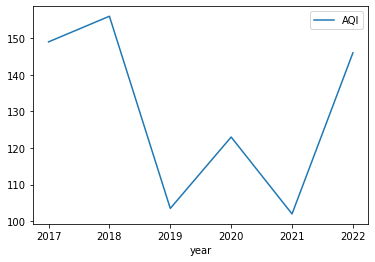

In [19]:
# zoom in on single month through years (Jan)
aqi.loc[aqi.month == 'Jan'].plot(x='year', y='AQI');

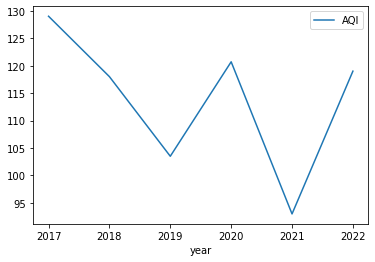

In [20]:
# zoom in on Feb
aqi.loc[aqi.month == 'Feb'].plot(x='year', y='AQI');

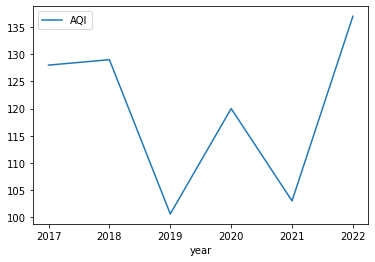

In [21]:
# zoom in on Mar
aqi.loc[aqi.month == 'Mar'].plot(x='year', y='AQI');

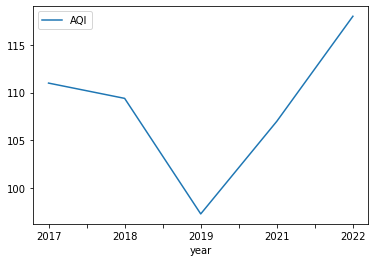

In [22]:
# zoom in on Apr
aqi.loc[aqi.month == 'Apr'].plot(x='year', y='AQI');

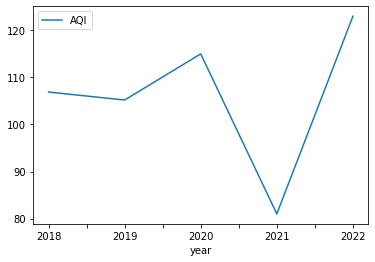

In [23]:
# zoom in on May
aqi.loc[aqi.month == 'May'].plot(x='year', y='AQI');

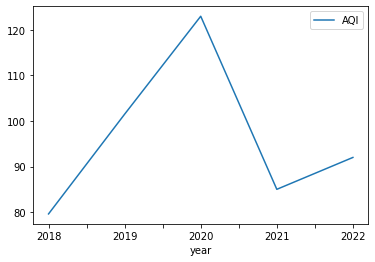

In [24]:
# zoom in on Jun
aqi.loc[aqi.month == 'Jun'].plot(x='year', y='AQI');

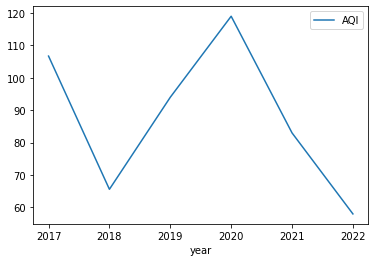

In [25]:
# zoom in on Jul
aqi.loc[aqi.month == 'Jul'].plot(x='year', y='AQI');

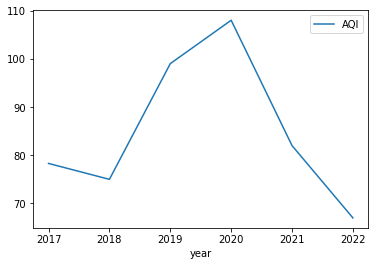

In [26]:
# zoom in on Aug
aqi.loc[aqi.month == 'Aug'].plot(x='year', y='AQI');

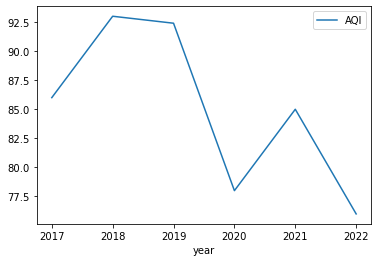

In [27]:
# zoom in on Sep
aqi.loc[aqi.month == 'Sep'].plot(x='year', y='AQI');

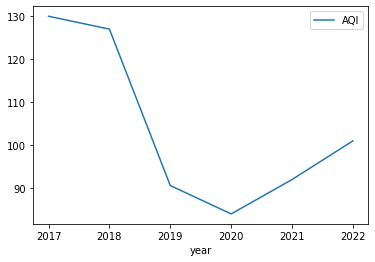

In [28]:
# zoom in on Oct
aqi.loc[aqi.month == 'Oct'].plot(x='year', y='AQI');

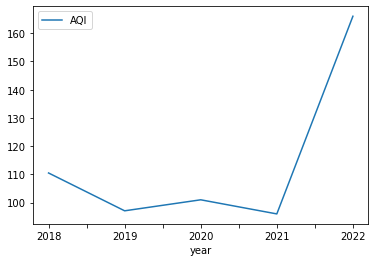

In [29]:
# zoom in on Nov
aqi.loc[aqi.month == 'Nov'].plot(x='year', y='AQI');

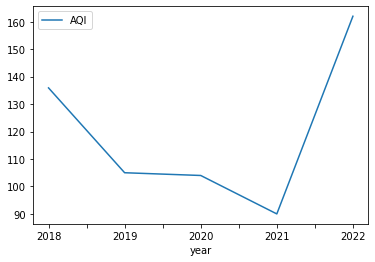

In [30]:
# zoom in on Dec
aqi.loc[aqi.month == 'Dec'].plot(x='year', y='AQI');

In [38]:
aqi_2017

,id,month,year,PM10,SO2,NOx,PM25,NH3,O3,CO,benzene,AQI,level_of_concern
0,1,Jan,2017,174.0,26.4,35.0,79,25.0,107.6,0.9,0.7,149.0,unhealthy for sensitive
1,2,Feb,2017,143.0,35.1,40.3,75,31.0,103.0,0.9,0.9,129.0,unhealthy for sensitive
2,3,Mar,2017,142.0,32.1,30.9,59,26.0,80.7,0.8,0.5,128.0,unhealthy for sensitive
3,4,Apr,2017,117.0,50.9,36.3,75,36.0,79.5,0.9,0.7,111.0,unhealthy for sensitive
6,7,Jul,2017,111.0,38.9,21.5,29,30.0,24.4,0.3,0.7,106.7,unhealthy for sensitive
7,8,Aug,2017,78.0,36.0,18.4,35,23.0,22.5,0.4,0.5,78.3,moderate
8,9,Sep,2017,86.0,30.0,22.3,39,20.0,35.2,0.4,0.4,86.0,moderate
9,10,Oct,2017,146.0,37.1,32.6,63,23.0,52.8,0.6,0.5,130.0,unhealthy for sensitive


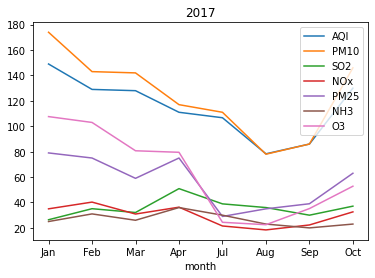

In [47]:
# creating dfs for each year
aqi_2017 = aqi.loc[aqi.year == '2017']
aqi_2017.plot(x='month', y=['AQI', 'PM10', 'SO2', 'NOx', 'PM25', 'NH3', 'O3'], title='2017');